# Imports

In [1]:
library(clustMixType)
library(wesanderson)
library(plyr)
library(feather)

# Loading the Data

## Markdown Cells

In [2]:
md_original <- read.csv("csv-files/full_markdown_group.csv")

In [3]:
# initial look at the data
head(md_original)

,X,nb_id,repo_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,⋯,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,has_reqtext,num_stars
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,79,106,165198456,True,True,False,False,0.9309106,0.3636364,0.7755102,⋯,0.75,4.500000,False,False,2,False,27,False,False,1
2,80,107,165198456,True,True,False,False,0.9309106,0.0000000,0.7755102,⋯,1.00,0.000000,False,False,2,False,27,False,False,1
3,81,108,165197188,False,False,False,False,1.0000000,0.5600000,0.3902439,⋯,1.00,1.913043,False,False,6,False,13,False,False,1
4,82,109,165197188,False,False,False,False,1.0000000,0.5600000,0.3902439,⋯,1.00,1.913043,False,False,6,False,13,False,False,1
5,83,110,165197188,False,False,False,False,1.0000000,0.5882353,0.3461538,⋯,1.00,0.000000,False,False,8,False,13,False,False,1
6,88,116,165201963,True,True,False,True,1.0000000,0.6666667,0.5932203,⋯,1.00,1.227273,False,False,8,False,32,False,False,0


In [4]:
# drop the first three columns
md_df <- md_original[ , !(names(md_original) %in% c("X", "nb_id", "repo_id"))]
head(md_df)

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,is_education,⋯,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,has_reqtext,num_stars
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,True,True,False,False,0.9309106,0.3636364,0.7755102,1,0.0000,True,⋯,0.75,4.500000,False,False,2,False,27,False,False,1
2,True,True,False,False,0.9309106,0.0000000,0.7755102,1,0.0000,True,⋯,1.00,0.000000,False,False,2,False,27,False,False,1
3,False,False,False,False,1.0000000,0.5600000,0.3902439,1,0.0000,True,⋯,1.00,1.913043,False,False,6,False,13,False,False,1
4,False,False,False,False,1.0000000,0.5600000,0.3902439,1,0.0000,True,⋯,1.00,1.913043,False,False,6,False,13,False,False,1
5,False,False,False,False,1.0000000,0.5882353,0.3461538,1,0.0000,True,⋯,1.00,0.000000,False,False,8,False,13,False,False,1
6,True,True,False,True,1.0000000,0.6666667,0.5932203,1,0.1875,True,⋯,1.00,1.227273,False,False,8,False,32,False,False,0


## No Markdown Cells

In [2]:
no_md_original <- read.csv("csv-files/full_no_markdown_group.csv")

In [3]:
# initial look at the data
head(no_md_original)

,X,nb_id,repo_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,⋯,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,has_reqtext,num_stars
,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,85,113,165197465,False,1.0000000,0.5000000,1,0.0000000,False,True,⋯,0.50000000,1.0000000,0.000000,False,False,1,False,False,False,0
2,90,118,165198993,False,1.0000000,0.5714286,1,0.4166667,False,True,⋯,0.04761905,0.9444444,4.555556,False,False,1,False,False,False,0
3,91,119,165198993,False,1.0000000,0.5957447,1,0.5714286,False,True,⋯,0.00000000,0.9565217,3.543478,True,True,1,False,False,False,0
4,94,122,165198375,False,0.5781782,0.0000000,1,0.0000000,False,True,⋯,0.97619048,1.0000000,0.000000,False,True,21,False,False,False,0
5,109,137,165196460,False,0.9672154,0.7272727,1,0.2500000,False,False,⋯,0.00000000,1.0000000,1.400000,False,False,0,False,False,False,0
6,119,147,165202599,False,0.8266760,0.3023256,1,0.1538462,False,False,⋯,0.00000000,0.9750000,2.450000,True,False,0,False,False,False,0


In [4]:
# drop the first three columns
no_md_df <- no_md_original[ , !(names(no_md_original) %in% c("X", "nb_id", "repo_id"))]
head(no_md_df)

,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,has_reqtext,num_stars
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,False,1.0000000,0.5000000,1,0.0000000,False,True,1,0.50000000,1.0000000,0.000000,False,False,1,False,False,False,0
2,False,1.0000000,0.5714286,1,0.4166667,False,True,1,0.04761905,0.9444444,4.555556,False,False,1,False,False,False,0
3,False,1.0000000,0.5957447,1,0.5714286,False,True,1,0.00000000,0.9565217,3.543478,True,True,1,False,False,False,0
4,False,0.5781782,0.0000000,1,0.0000000,False,True,1,0.97619048,1.0000000,0.000000,False,True,21,False,False,False,0
5,False,0.9672154,0.7272727,1,0.2500000,False,False,1,0.00000000,1.0000000,1.400000,False,False,0,False,False,False,0
6,False,0.8266760,0.3023256,1,0.1538462,False,False,1,0.00000000,0.9750000,2.450000,True,False,0,False,False,False,0


## Combined

In [2]:
combined_original <- read.csv("csv-files/full_groups_combined.csv")

In [3]:
# initial look at the data
head(combined_original)

,X,nb_id,repo_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,⋯,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,has_reqtext,num_stars
,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,79,106,165198456,False,0.9309106,0.3636364,1,0.0000,True,True,⋯,0.54545455,0.75,4.500000,False,False,2,False,False,False,1
2,80,107,165198456,False,0.9309106,0.0000000,1,0.0000,True,True,⋯,1.00000000,1.00,0.000000,False,False,2,False,False,False,1
3,81,108,165197188,False,1.0000000,0.5600000,1,0.0000,True,True,⋯,0.00000000,1.00,1.913043,False,False,6,False,False,False,1
4,82,109,165197188,False,1.0000000,0.5600000,1,0.0000,True,True,⋯,0.00000000,1.00,1.913043,False,False,6,False,False,False,1
5,83,110,165197188,False,1.0000000,0.5882353,1,0.0000,True,True,⋯,0.97058824,1.00,0.000000,False,False,8,False,False,False,1
6,88,116,165201963,False,1.0000000,0.6666667,1,0.1875,True,True,⋯,0.04166667,1.00,1.227273,False,False,8,False,False,False,0


In [4]:
# drop the first three columns
combined_df <- combined_original[ , !(names(combined_original) %in% c("X", "nb_id", "repo_id"))]
head(combined_df)

,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,has_reqtext,num_stars
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,False,0.9309106,0.3636364,1,0.0000,True,True,3,0.54545455,0.75,4.500000,False,False,2,False,False,False,1
2,False,0.9309106,0.0000000,1,0.0000,True,True,1,1.00000000,1.00,0.000000,False,False,2,False,False,False,1
3,False,1.0000000,0.5600000,1,0.0000,True,True,1,0.00000000,1.00,1.913043,False,False,6,False,False,False,1
4,False,1.0000000,0.5600000,1,0.0000,True,True,1,0.00000000,1.00,1.913043,False,False,6,False,False,False,1
5,False,1.0000000,0.5882353,1,0.0000,True,True,1,0.97058824,1.00,0.000000,False,False,8,False,False,False,1
6,False,1.0000000,0.6666667,1,0.1875,True,True,1,0.04166667,1.00,1.227273,False,False,8,False,False,False,0


# K-Prototypes Clustering

## Markdown Cells

In [5]:
md_kprotos <- kproto(x = md_df, nstart = 10, k = 3)

# NAs in variables:
longer_beginning    longer_ending       has_author     has_equation 
               0                0                0                0 
    jupyter_prop output_cell_prop    markdown_prop      num_contrib 
               0                0                0                0 
      image_prop     is_education        has_links     has_comments 
               0                0                0                0 
    md_frequency        has_title      num_commits        md_format 
               0                0                0                0 
   non_exec_prop     exec_inorder       exec_skips        has_error 
               0                0                0                0 
      has_export    num_functions         has_test      num_headers 
               0                0                0                0 
       has_param      has_reqtext        num_stars 
               0                0                0 
0 observation(s) with NAs.

Estimated lambda: 10

In [26]:
md_kprotos2 <- kproto(x = md_df, nstart = 10, k = 4)

# NAs in variables:
longer_beginning    longer_ending       has_author     has_equation 
               0                0                0                0 
    jupyter_prop output_cell_prop    markdown_prop      num_contrib 
               0                0                0                0 
      image_prop     is_education        has_links     has_comments 
               0                0                0                0 
    md_frequency        has_title      num_commits        md_format 
               0                0                0                0 
   non_exec_prop     exec_inorder       exec_skips        has_error 
               0                0                0                0 
      has_export    num_functions         has_test      num_headers 
               0                0                0                0 
       has_param      has_reqtext        num_stars 
               0                0                0 
0 observation(s) with NAs.

Estimated lambda: 10

## No Markdown Cells

In [25]:
no_md_kprotos <- kproto(x = no_md_df, nstart = 10, k = 3)

# NAs in variables:
      has_author     jupyter_prop output_cell_prop      num_contrib 
               0                0                0                0 
      image_prop     is_education     has_comments      num_commits 
               0                0                0                0 
   non_exec_prop     exec_inorder       exec_skips        has_error 
               0                0                0                0 
      has_export    num_functions         has_test        has_param 
               0                0                0                0 
     has_reqtext        num_stars 
               0                0 
0 observation(s) with NAs.

Estimated lambda: 9648.733 

# NAs in variables:
      has_author     jupyter_prop output_cell_prop      num_contrib 
               0                0                0                0 
      image_prop     is_education     has_comments      num_commits 
               0                0                0                0 
   no

In [41]:
no_md_kprotos2 <- kproto(x = no_md_df, nstart = 10, k = 4)

# NAs in variables:
      has_author     jupyter_prop output_cell_prop      num_contrib 
               0                0                0                0 
      image_prop     is_education     has_comments      num_commits 
               0                0                0                0 
   non_exec_prop     exec_inorder       exec_skips        has_error 
               0                0                0                0 
      has_export    num_functions         has_test        has_param 
               0                0                0                0 
     has_reqtext        num_stars 
               0                0 
0 observation(s) with NAs.

Estimated lambda: 9648.733 

# NAs in variables:
      has_author     jupyter_prop output_cell_prop      num_contrib 
               0                0                0                0 
      image_prop     is_education     has_comments      num_commits 
               0                0                0                0 
   no

In [5]:
no_md_kprotos2 <- readRDS('r-objs/no_md_kprotos_obj4')

## Combined

In [5]:
combined_kprotos <- kproto(x = combined_df, nstart = 10, k = 4)

# NAs in variables:
      has_author     jupyter_prop output_cell_prop      num_contrib 
               0                0                0                0 
      image_prop     is_education     has_comments      num_commits 
               0                0                0                0 
   non_exec_prop     exec_inorder       exec_skips        has_error 
               0                0                0                0 
      has_export    num_functions         has_test        has_param 
               0                0                0                0 
     has_reqtext        num_stars 
               0                0 
0 observation(s) with NAs.

Estimated lambda: 16142.47 

# NAs in variables:
      has_author     jupyter_prop output_cell_prop      num_contrib 
               0                0                0                0 
      image_prop     is_education     has_comments      num_commits 
               0                0                0                0 
   no

# Analysis of Results

## Markdown Cells

In [6]:
md_kprotos

Numeric predictors: 13 
Categorical predictors: 14 
Lambda: 10048.9 

Number of Clusters: 3 
Cluster sizes: 106 37909 31825 
Within cluster error: 554468525 1007940948 748252526 

Cluster prototypes:
  longer_beginning longer_ending has_author has_equation jupyter_prop
1            False         False      False        False    0.9574174
2             True         False      False        False    0.9538977
3            False         False      False        False    0.9577413
  output_cell_prop markdown_prop num_contrib image_prop is_education has_links
1        0.2857421     0.4259094   16.462264 0.09872815         True      True
2        0.5000476     0.4523070    2.047693 0.27434897         True      True
3        0.5104342     0.2715700    1.712176 0.32199881        False     False
  has_comments md_frequency has_title num_commits md_format non_exec_prop
1         True    0.5934420     False    3.990566     False     0.5972469
2         True    0.5946234      True    1.982010      T

In [30]:
saveRDS(md_kprotos, file = "r-objs/md_kprotos_obj3")

In [36]:
saveRDS(md_kprotos2, file = "r-objs/md_kprotos_obj4")

In [8]:
md_kprotos$centers

longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,is_education,⋯,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,has_reqtext,num_stars
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>
False,False,False,False,0.9574174,0.2857421,0.4259094,16.462264,0.09872815,True,⋯,0.9743209,1.199675,False,False,3.386792,False,7.971698,False,False,4237.70755
True,False,False,False,0.9538977,0.5000476,0.4523070,2.047693,0.27434897,True,⋯,0.9503782,3.873737,False,False,5.168087,False,12.864227,False,False,11.14136
False,False,False,False,0.9577413,0.5104342,0.2715700,1.712176,0.32199881,False,⋯,0.9326935,5.900995,False,False,4.160440,False,6.156229,False,False,11.15378


In [33]:
write_feather(md_kprotos$centers, "prototypes-output/md_centers3.feather")

In [37]:
write_feather(md_kprotos2$centers, "prototypes-output/md_centers4.feather")

In [10]:
md_kprotos$dists

1,17990502,10364.49,60840.07
2,17990500,10379.72,60872.92
3,17970070,30256.31,20268.40
4,17970070,30256.31,20268.40
5,17970085,30275.30,20299.26
6,18009257,20605.28,71172.53
7,18008675,20274.84,70535.92
8,17988615,60534.43,10220.44
9,17988612,60535.46,10221.82
10,17979071,30799.55,40879.14
11,17988588,40432.29,10214.36


In [35]:
write_feather(as.data.frame(t(md_kprotos$dists)), "prototypes-output/md_dists3.feather")

In [38]:
write_feather(as.data.frame(t(md_kprotos2$dists)), "prototypes-output/md_dists4.feather")

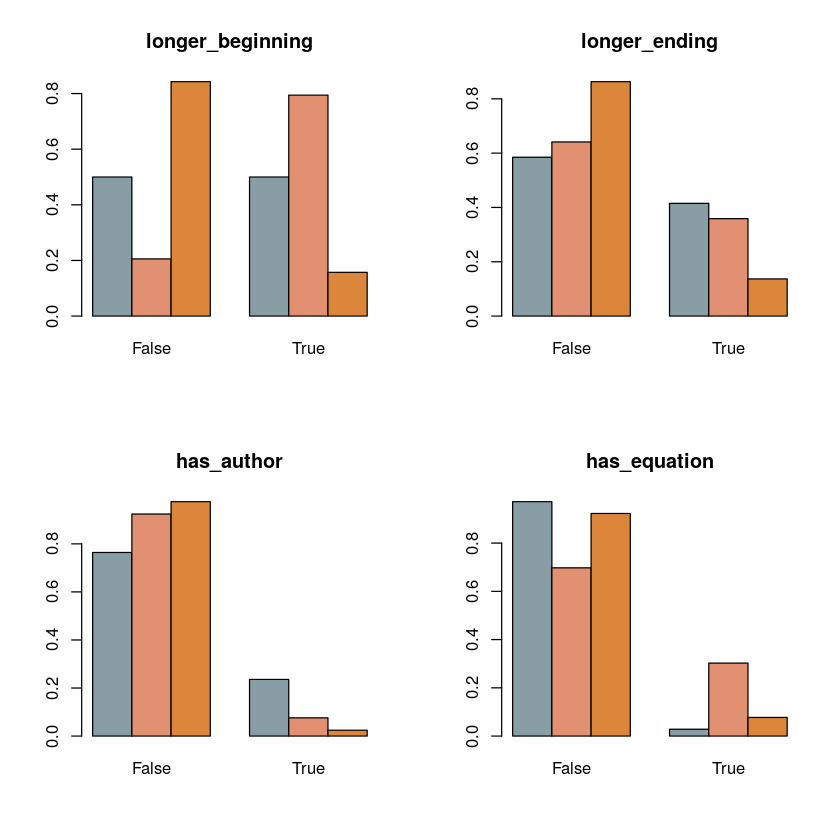

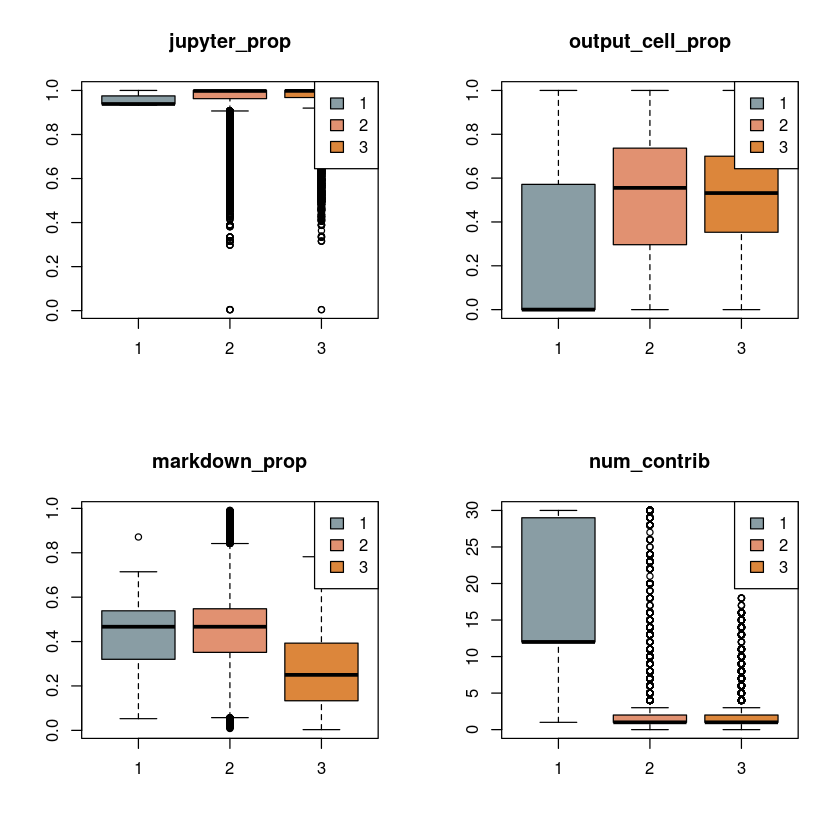

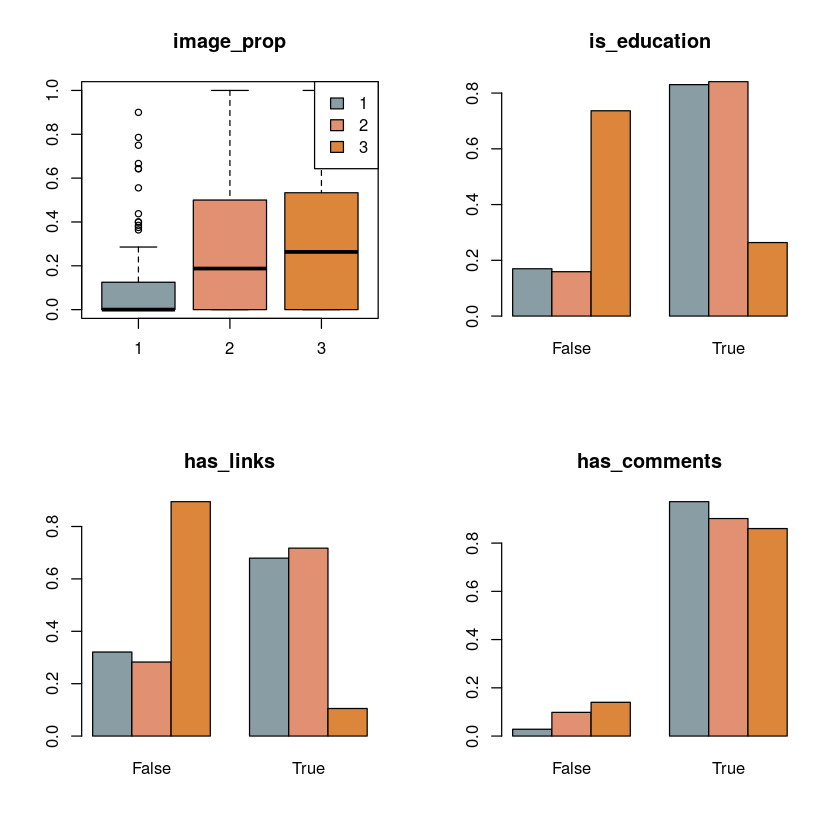

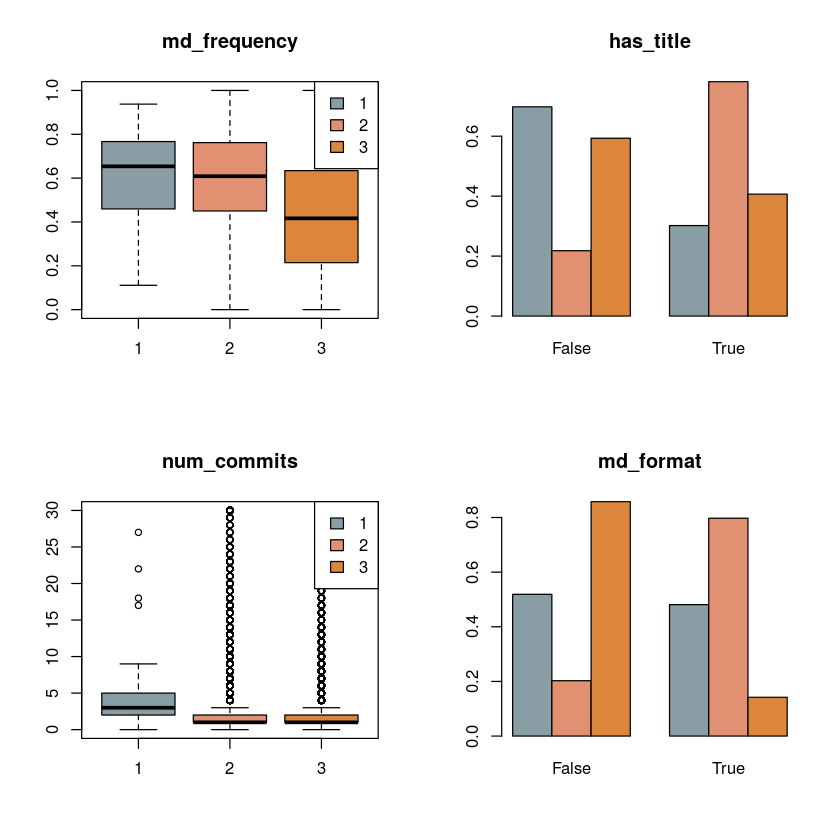

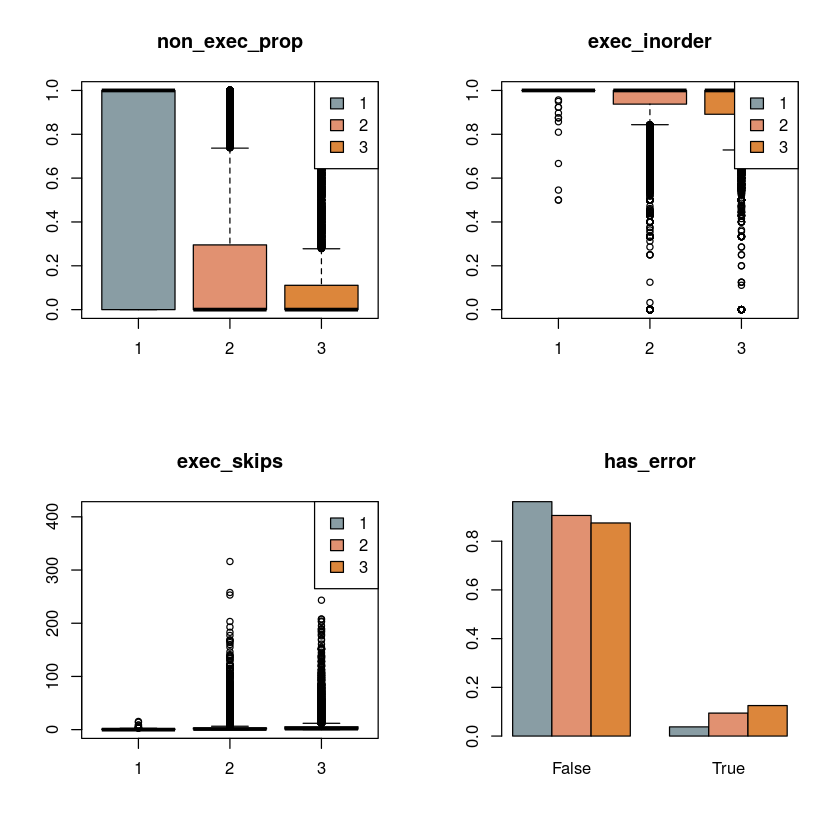

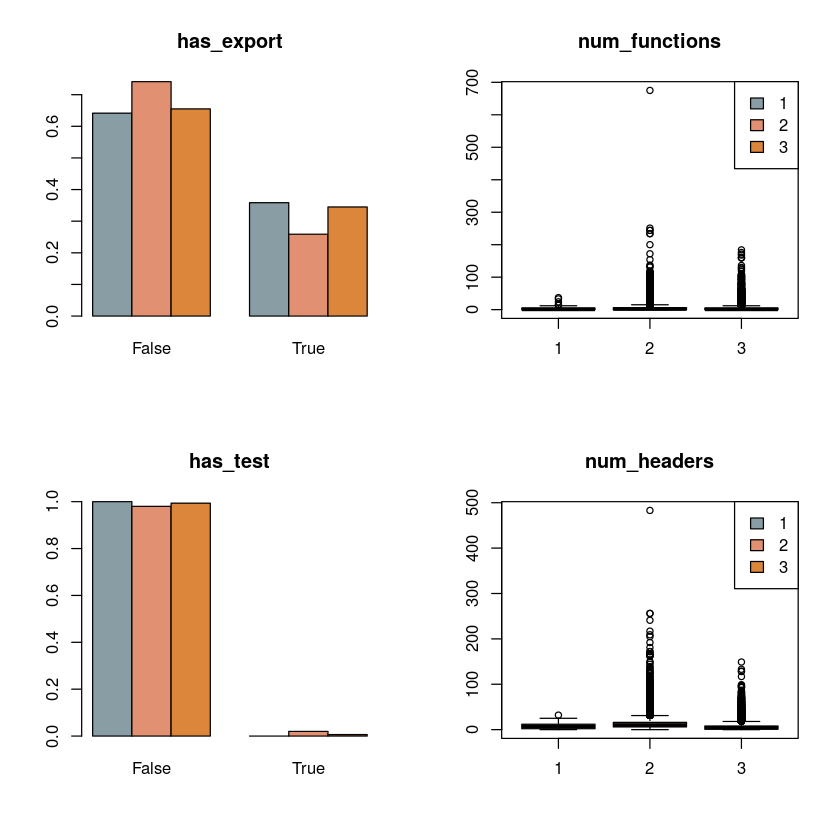

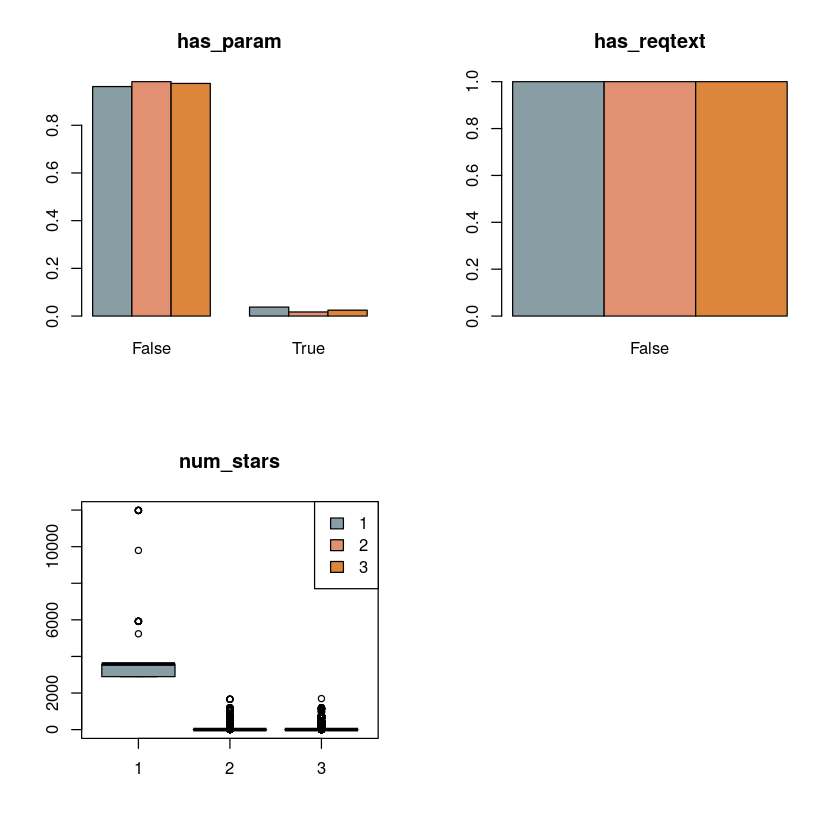

In [13]:
par(mfrow=c(2, 2))
clprofiles(md_kprotos, md_df, col = wes_palette("Royal1", 3, type = "continuous"))

In [16]:
md_kprotos$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    2     2     3     3     3     2     2     3     3     2     3     3     3 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    3     2     2     2     3     3     2     2     3     3     3     3     3 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    3     3     3     3     2     2     3     2     3     3     2     2     3 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    3     2     3     2     2     3     2     2     2     2     2     3     3 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    3     3     2     3     3     2     3     2     3     3     3     2     3 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    3     2     2     2     2     2     2     3     2     3     3     3     3 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    3     3     3     3     3     3     3     3     3     2     2     3     3 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     2     2     3     2     3     3     3     3     3     3     3     3 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     2     2     2     2     3     3     3     2     3     3     3     2 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    3     2     2     3     3     3     3     3     2     3     2     2     3 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    3     3     2     2     2     2     2     2     2     2     2     2     2 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    2     2     2     2     2     2     2     2     2     2     2     2     3 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    3     3     3     3     2     3     3     3     3     3     3     3     3 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    2     2     2     3     3     3     3     3     2     3     2     3     3 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    3     3     3     3     3     2     2     2     2     2     2     2     2 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    2     2     2     3     2     2     2     2     2     2     2     2     2 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    2     2     3     3     2     2     2     3     2     3     3     3     3 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    2     2     2     3     3     3     3     3     2     2     2     2     3 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    3     3     3     3     2     3     3     2     3     2     2     2     3 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    3     3     3     2     2     2     3     3     2     3     3     2     2 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    3     2     2     3     3     3     3     2     2     2     2     2     2 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    2     3     3     2     3     2     3     2     3     3     2     3     3 
  326   327   328   329   330   331   332   333   334 

In [39]:
write_feather(as.data.frame(md_kprotos$cluster), "prototypes-output/md_clusters3.feather")

In [40]:
write_feather(as.data.frame(md_kprotos2$cluster), "prototypes-output/md_clusters4.feather")

## No Markdown Cells

In [26]:
no_md_kprotos

Numeric predictors: 10 
Categorical predictors: 8 
Lambda: 9648.733 

Number of Clusters: 4 
Cluster sizes: 16730 8749 26 10393 
Within cluster error: 77836583 40958351 71152215 55967512 

Cluster prototypes:
  has_author jupyter_prop output_cell_prop num_contrib image_prop is_education
1      False    0.9392610        0.4516239    1.827137 0.26299361        False
2      False    0.9401135        0.3913508    1.645788 0.22061016        False
3      False    0.9424643        0.1748062   11.692308 0.07164918         True
4      False    0.9380242        0.4118788    1.795632 0.27291460        False
  has_comments num_commits non_exec_prop exec_inorder exec_skips has_error
1         True    1.427735    0.11825493    0.9281447  5.1268604     False
2        False    1.279918    0.09675097    0.9467627  2.9575861     False
3         True    3.153846    0.83238722    1.0000000  0.4927961     False
4         True    1.627057    0.14901417    0.9082854  7.2098535     False
  has_export num_func

In [42]:
saveRDS(no_md_kprotos, file = 'r-objs/no_md_kprotos_obj3')

In [43]:
saveRDS(no_md_kprotos2, file = 'r-objs/no_md_kprotos_obj4')

In [36]:
no_md_kprotos$centers

has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,has_reqtext,num_stars
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
False,0.9392610,0.4516239,1.827137,0.26299361,False,True,1.427735,0.11825493,0.9281447,5.1268604,False,False,2.826718,False,False,False,6.853796
False,0.9401135,0.3913508,1.645788,0.22061016,False,False,1.279918,0.09675097,0.9467627,2.9575861,False,False,0.982398,False,False,False,5.224254
False,0.9424643,0.1748062,11.692308,0.07164918,True,True,3.153846,0.83238722,1.0000000,0.4927961,False,False,2.153846,False,False,False,4065.384615
False,0.9380242,0.4118788,1.795632,0.27291460,False,True,1.627057,0.14901417,0.9082854,7.2098535,False,True,4.820360,False,False,False,7.780525


In [44]:
write_feather(no_md_kprotos$centers, "prototypes-output/no_md_centers3.feather")

In [45]:
write_feather(no_md_kprotos2$centers, "prototypes-output/no_md_centers4.feather")

In [38]:
no_md_kprotos$dists

1,77.68931,9685.49834,16537122,9777.0906
2,51.55183,9679.15190,16537139,9731.9978
3,19351.28597,28974.50865,16556429,9738.4845
4,10054.27220,19735.81497,16547124,376.3918
5,9718.55051,31.30605,16546775,19416.1505
6,19360.52657,9677.77937,16556426,29053.7191
7,61.79721,9677.73696,16537130,9753.8954
8,11710.97717,2241.89532,16549220,21198.0988
9,64.34599,9678.24679,16537129,9758.4184
10,82.21100,9686.30989,16537125,9785.6304
11,9711.74044,29.50462,16546775,19404.3230


In [46]:
write_feather(as.data.frame(t(no_md_kprotos$dists)), "prototypes-output/no_md_dists3.feather")

In [47]:
write_feather(as.data.frame(t(no_md_kprotos2$dists)), "prototypes-output/no_md_dists4.feather")

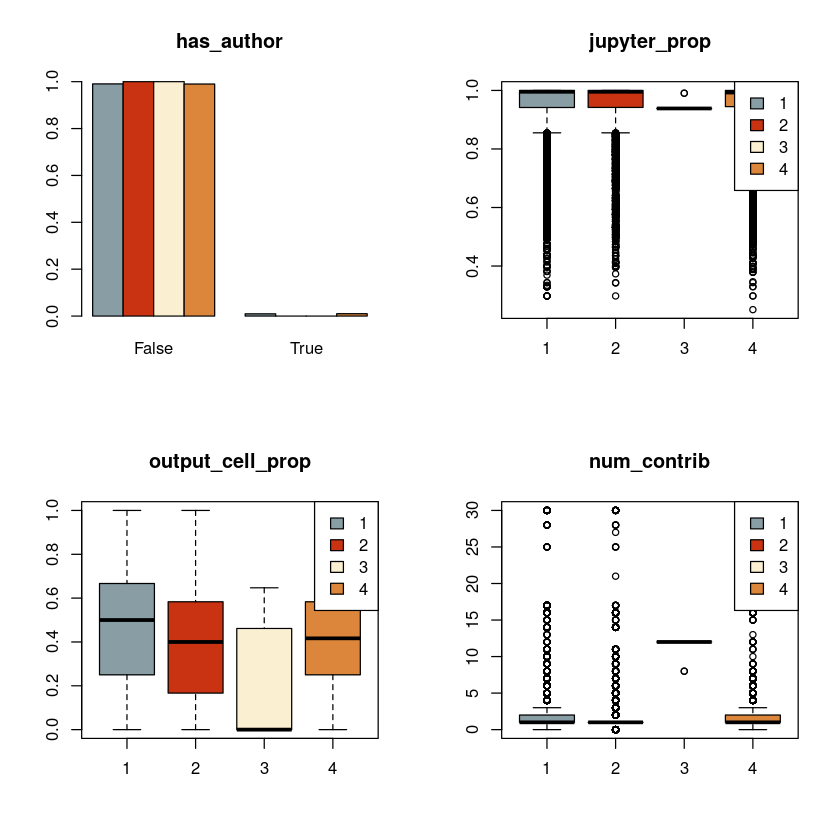

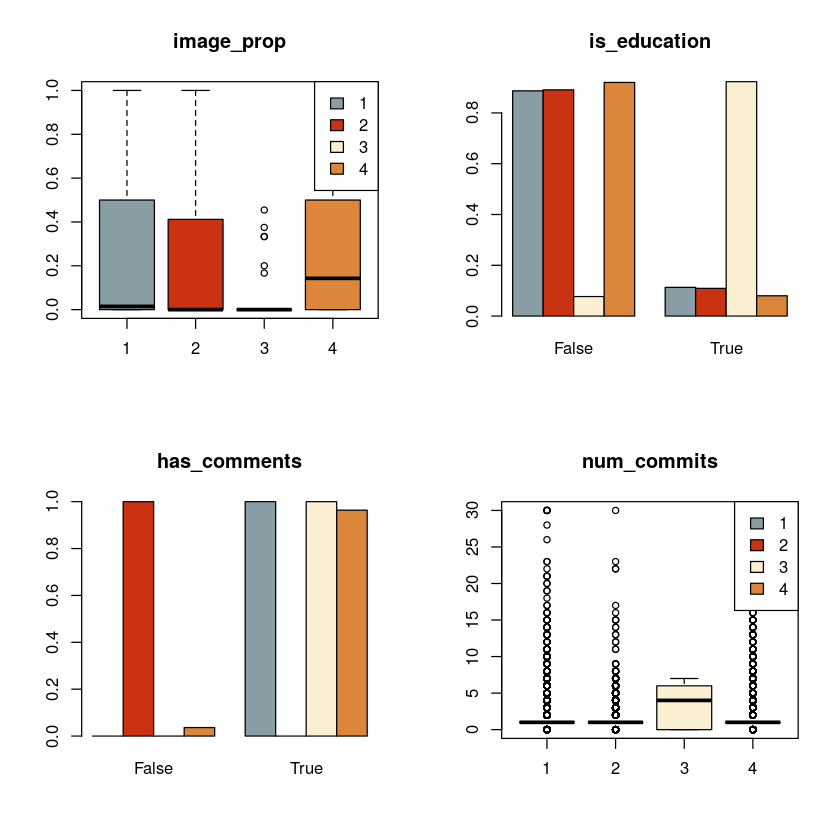

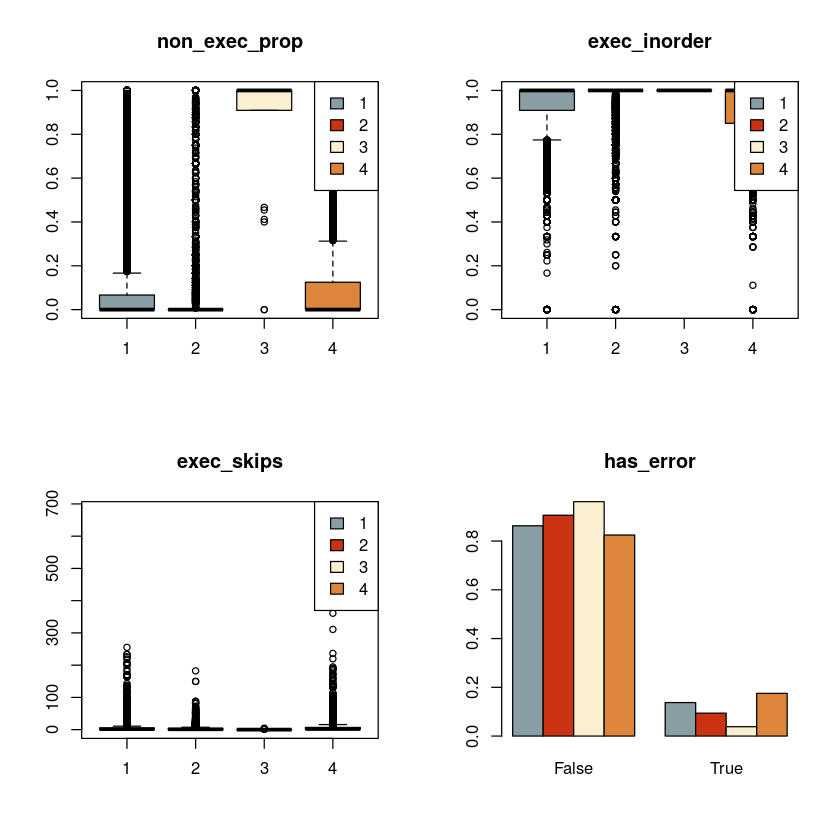

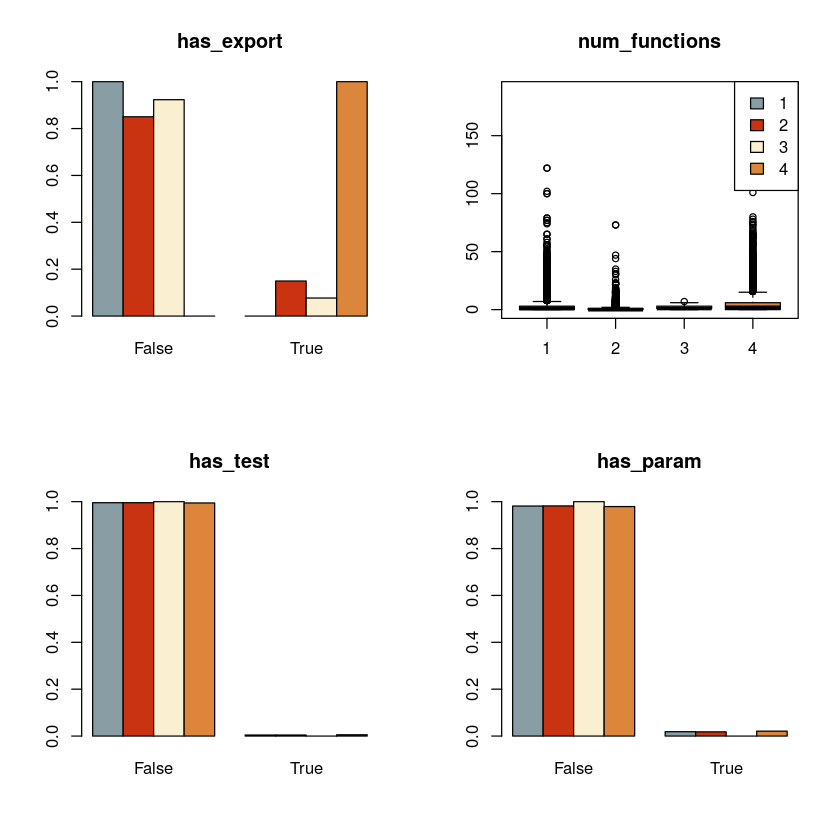

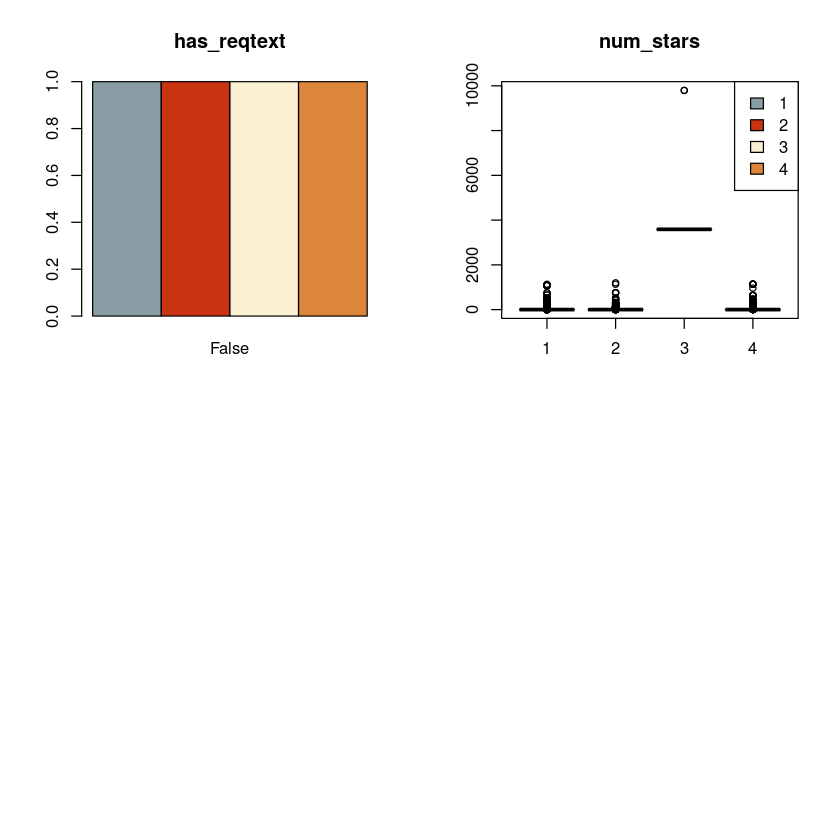

In [29]:
par(mfrow=c(2, 2))
clprofiles(no_md_kprotos, no_md_df, col = wes_palette("Royal1", 4, type = "continuous"))

In [6]:
no_md_kprotos2$clustervalu

1     2     3     4     5     6     7     8     9    10    11    12    13 
    1     1     2     2     4     4     1     4     1     1     4     4     4 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    1     4     4     1     1     1     1     1     1     1     1     4     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    4     4     1     1     1     1     4     1     1     4     4     4     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    1     4     1     1     1     1     1     4     1     4     1     1     1 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    1     1     1     1     4     2     1     1     1     2     1     1     1 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    1     1     1     4     1     2     1     1     4     2     4     4     1 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    4     1     4     4     4     1     4     4     4     4     4     4     1 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     4     4     4     1     1     4     4     1     4     4     1     4 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    4     4     2     4     4     1     1     1     4     1     4     1     1 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    1     1     4     4     1     1     1     1     1     1     1     1     1 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    1     1     2     2     2     4     2     2     1     4     4     2     1 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    1     2     2     1     1     4     1     1     2     1     4     1     1 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    1     1     1     4     1     2     2     1     1     1     1     1     1 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    2     2     4     4     2     2     1     1     2     1     1     4     1 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    4     2     2     4     1     4     4     1     1     4     1     4     1 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    1     1     2     1     4     1     2     1     1     4     1     4     1 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    1     1     1     1     1     1     1     1     1     4     1     1     1 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    1     1     1     1     1     1     4     1     1     1     1     1     2 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    1     1     1     1     4     1     1     1     1     1     1     4     1 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    1     1     1     1     1     1     1     1     1     1     1     4     1 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    1     1     1     1     1     4     1     1     1     4     1     1     1 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    2     1     1     1     1     1     1     1     1     1     1     1     1 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    1     1     1     1     1     4     1     1     1     1     1     1     1 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    4     1     1     4     1     1     1     1     1     1     1     1     1 
  326   327   328   329   330   331   332   333   334 

In [48]:
write_feather(as.data.frame(no_md_kprotos$cluster), "prototypes-output/no_md_clusters3.feather")

In [49]:
write_feather(as.data.frame(no_md_kprotos2$cluster), "prototypes-output/no_md_clusters4.feather")

## Combined

In [6]:
combined_kprotos

Numeric predictors: 10 
Categorical predictors: 8 
Lambda: 16142.47 

Number of Clusters: 4 
Cluster sizes: 23448 132 42063 40095 
Within cluster error: 274657709 624649439 440901047 371494939 

Cluster prototypes:
  has_author jupyter_prop output_cell_prop num_contrib image_prop is_education
1      False    0.9455678        0.4349429    1.810901 0.29073201        False
2      False    0.9544721        0.2638911   15.522727 0.09339441         True
3      False    0.9550114        0.5056748    1.961082 0.28167344         True
4      False    0.9474218        0.4736846    1.765657 0.27806948        False
  has_comments num_commits non_exec_prop exec_inorder exec_skips has_error
1         True    1.942468     0.1692225    0.9145319   7.826847     False
2         True    3.825758     0.6435624    0.9793789   1.060441     False
3         True    1.804626     0.2140235    0.9490449   3.685852     False
4         True    1.575209     0.1295778    0.9377263   4.555856     False
  has_export nu

In [7]:
saveRDS(combined_kprotos, file = "r-objs/combined_kprotos_obj4")

In [8]:
combined_kprotos$centers

has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,has_reqtext,num_stars
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
False,0.9455678,0.4349429,1.810901,0.29073201,False,True,1.942468,0.1692225,0.9145319,7.826847,False,True,5.947629,False,False,False,13.720531
False,0.9544721,0.2638911,15.522727,0.09339441,True,True,3.825758,0.6435624,0.9793789,1.060441,False,False,3.143939,False,False,False,4203.765152
False,0.9550114,0.5056748,1.961082,0.28167344,True,True,1.804626,0.2140235,0.9490449,3.685852,False,False,4.467109,False,False,False,7.154102
False,0.9474218,0.4736846,1.765657,0.27806948,False,True,1.575209,0.1295778,0.9377263,4.555856,False,False,2.667340,False,False,False,9.874523


In [9]:
write_feather(combined_kprotos$centers, "prototypes-output/combined_centers4.feather")

In [10]:
combined_kprotos$dists

1,32475.4311,17663460,47.22460,16224.5864
2,32526.1056,17663456,60.07219,16244.4055
3,32483.4058,17663463,45.06940,16240.3401
4,32483.4058,17663463,45.06940,16240.3401
5,32514.5231,17663479,66.17407,16272.1383
6,32522.5894,17671884,71.34733,16280.4664
7,16429.8733,17688014,16229.71686,32412.2930
8,270.8765,17704182,32366.37924,16261.8355
9,271.9916,17704179,32367.76999,16263.6851
10,16837.4553,17688573,16717.18151,32996.9767
11,16405.4329,17688014,16219.39356,113.9522


In [11]:
write_feather(as.data.frame(t(combined_kprotos$dists)), "prototypes-output/combined_dists4.feather")

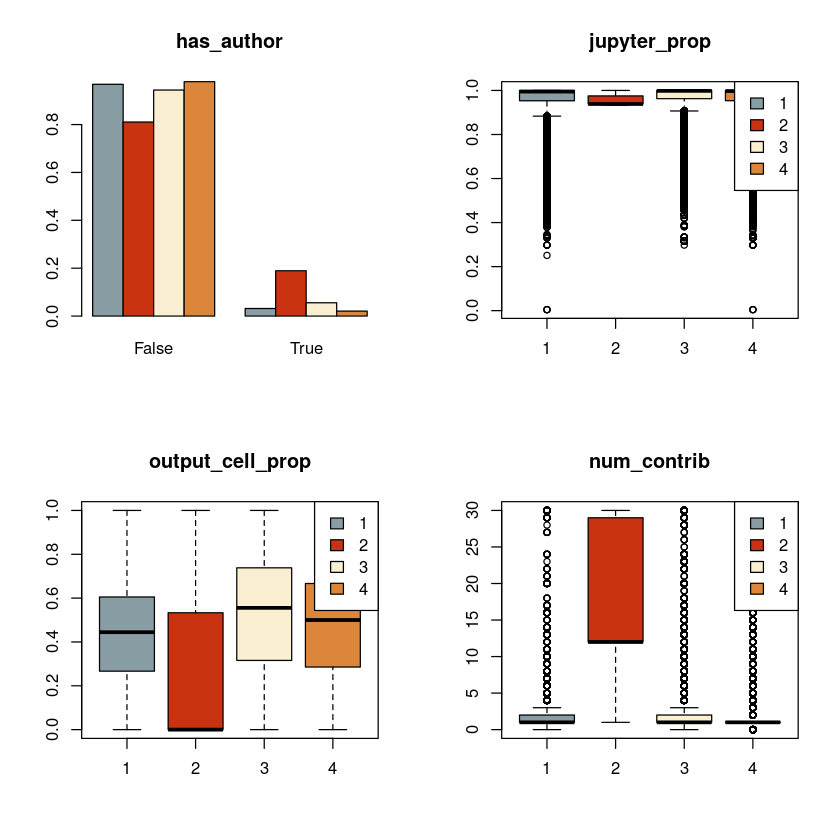

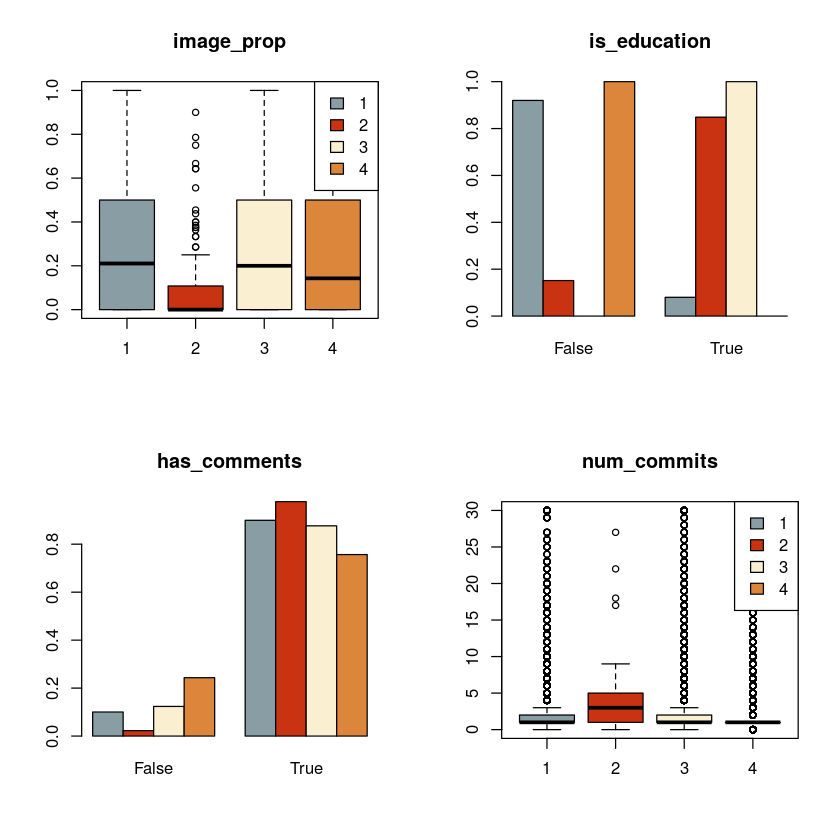

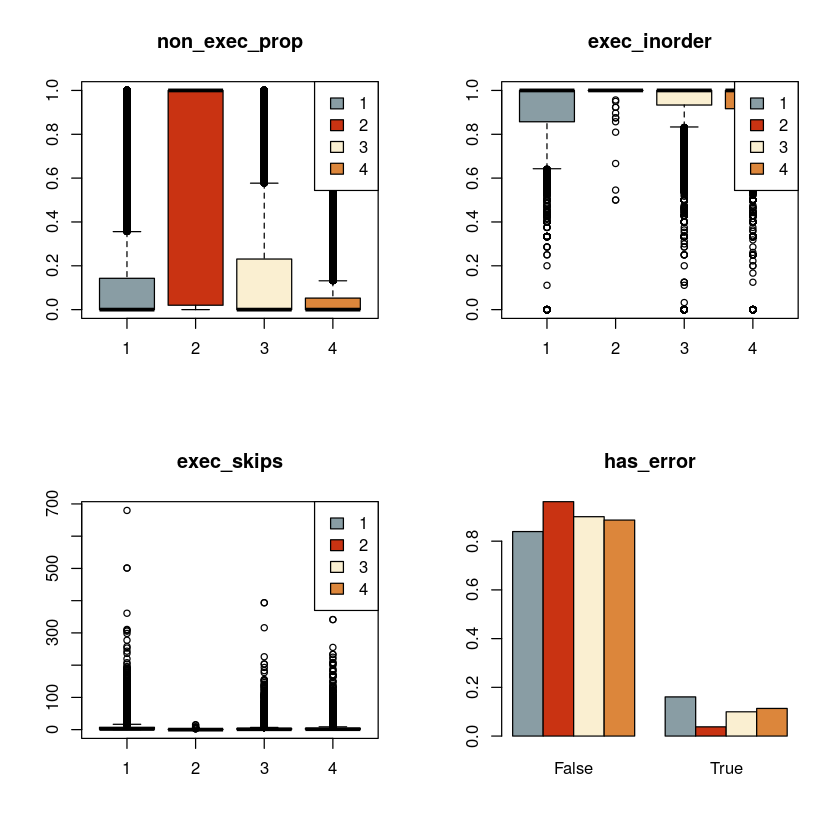

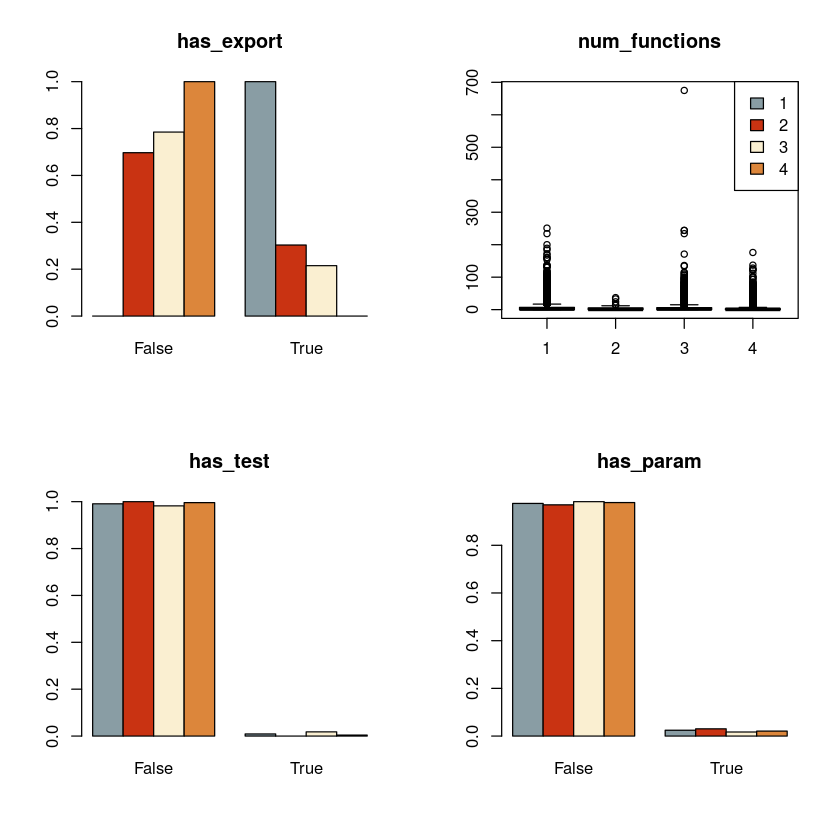

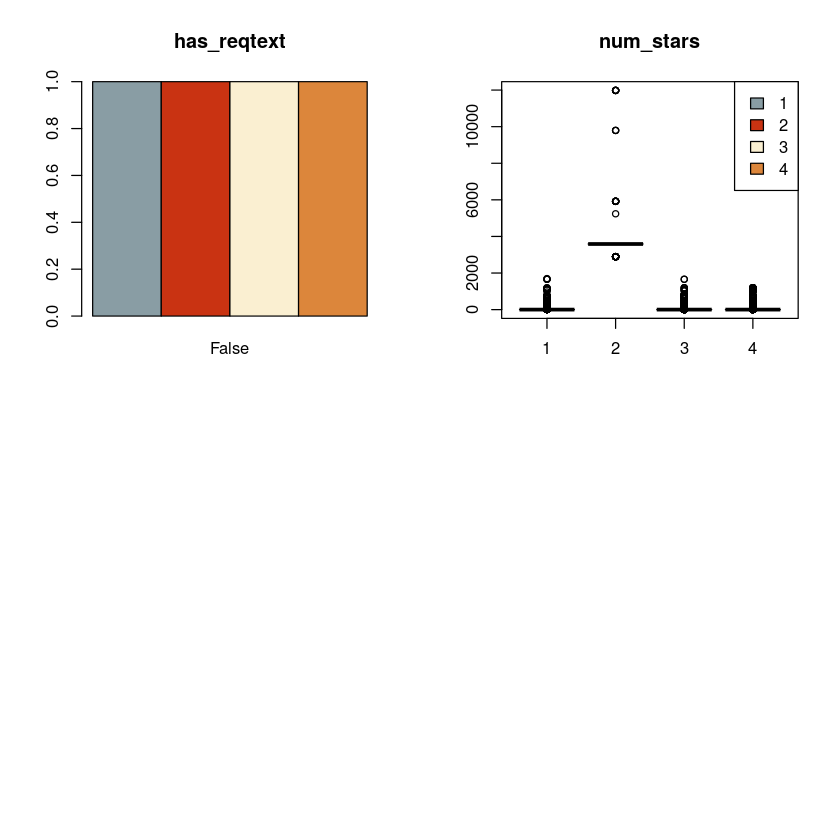

In [12]:
par(mfrow = c(2, 2))
clprofiles(combined_kprotos, combined_df, col = wes_palette("Royal1", 4, type = "continuous"))

In [13]:
combined_kprotos$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    3     3     3     3     3     3     3     1     1     3     4     4     4 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    4     3     3     3     4     4     3     3     4     4     4     4     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    3     1     3     3     3     3     3     3     4     4     3     4     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    4     3     1     3     1     1     1     3     3     3     3     1     4 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    1     1     3     4     1     3     1     3     1     1     4     3     4 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    1     3     3     3     3     3     3     1     3     3     3     4     3 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    1     1     1     1     3     1     1     1     1     3     3     4     3 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    3     3     3     1     3     3     4     3     3     3     3     4     4 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    3     3     3     4     4     4     4     1     3     1     4     4     4 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    1     4     3     3     4     4     4     1     3     4     4     3     4 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    1     4     3     1     4     4     3     4     3     3     3     3     3 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    4     4     3     3     3     3     3     3     3     3     3     3     3 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    3     3     3     3     1     3     3     3     1     3     3     3     1 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    1     3     1     3     4     1     1     1     3     3     1     4     1 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    3     1     4     4     3     4     1     4     1     4     1     4     4 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    3     3     3     1     1     1     3     3     3     3     3     4     4 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    4     4     4     4     4     3     3     3     3     3     3     3     3 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    4     3     3     4     3     3     3     3     3     3     3     4     3 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    3     4     3     4     3     3     3     1     3     1     3     1     3 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    3     3     3     1     1     1     1     1     4     1     3     3     3 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    3     3     3     1     1     1     1     1     1     3     1     3     1 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    4     4     1     3     4     3     4     4     3     4     4     3     3 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    4     3     3     4     4     4     4     3     3     3     3     3     3 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    3     4     1     1     4     1     4     3     4     4     3     4     4 
  326   327   328   329   330   331   332   333   334 

In [14]:
write_feather(as.data.frame(combined_kprotos$cluster), "prototypes-output/combined_clusters4.feather")